In [1]:
import matplotlib.pylab as plt
import pandas as pd

In [2]:
# loop through the sheets of the spreadsheet; each sheet is a biological replicate
# of all 3 of the biolog plates. Columns are time in hours.
reps = {}
for i in range(0,4):
    biolog_raw = pd.read_excel('../data/experiments/biolog_raw.xlsx',sheet_name="rep_"+str(i+1))
    biolog_raw.columns = [col for col in biolog_raw.columns]
    reps[i] = biolog_raw
    
all_biolog = pd.concat([reps[0],reps[1],reps[2],reps[3]])
    
# convert to mean and std at each time point, 
# and get the max OD at all time points (from means)
mets = reps[0].index.unique()
means = {}
stds = {}
maxODs = {}
for met in mets:
    vals = pd.DataFrame()
    concat_axis = 1
    if met == 'Neg':
        concat_axis = 0
    
    for rep in reps:
        vals = pd.concat([vals,reps[rep].loc[met]],axis=concat_axis)
    
    if met != 'Neg':
        vals = vals.T
    
    means[met] = vals.mean()
    stds[met] = vals.std()
    maxODs[met] = means[met].max()
    
        

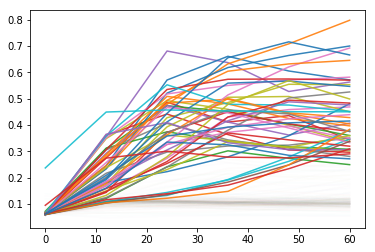

In [3]:
fig,ax = plt.subplots()
for met in means.keys():
    plotvals = means[met]
    if maxODs[met] > 0.3:
        alpha = 0.9
    else:
        alpha = 0.01
    ax.plot(plotvals.index.values,plotvals.values,alpha=alpha,label = met)

In [65]:
# threshold the growth data to get positive growth conditions only
growth_threshold = 0.3
positive_growth_conditions = {condition:maxODs[condition] for condition in maxODs.keys() if maxODs[condition] > growth_threshold}
phenotypes = pd.DataFrame.from_dict(positive_growth_conditions,orient='index')
phenotypes.columns = ["Max OD"]

# Read in the bioog:seed file and merge with the positive growth data to get SEED compound ids for each metabolite
biolog_to_seed = pd.read_csv('../data/biolog_names_to_seed.tsv', sep = '\t')
biolog_to_seed.index = biolog_to_seed["name"]
biolog_to_seed = biolog_to_seed.drop("name", axis=1)
carbon_sources = phenotypes.index.tolist()
phenotypes = phenotypes.merge(biolog_to_seed, left_index=True, right_index=True)
carbon_sources_post_merge = phenotypes.index.tolist()
# Print out the metabolites missing identifiers. These might be expected (e.g. pectin is a polymer that
# cannot be properly represented, so we don't include it)
print("The following compounds are missing; is this expected?", set(carbon_sources) - set(carbon_sources_post_merge))

The following compounds are missing; is this expected? {'Pectin'}


In [64]:
phenotypes

,Max OD,seed_id
4-Hydroxy Benzoic Acid,0.170775,cpd00136
Acetic Acid,0.229450,cpd00029
Adenosine,0.230700,cpd00182
Bromo Succinic Acid,0.287150,cpd23859
Butyric Acid,0.165450,cpd00211
Caproic Acid,0.235125,cpd01113
Citric Acid,0.441850,cpd00137
"D,L-Malic Acid",0.492725,"cpd00130,cpd00386"
D-Alanine,0.488200,cpd00117
D-Arabitol,0.439550,cpd01307


In [6]:
import medusa
from medusa.test import load_biolog_plata

# Load the biolog data from Plata et al., Nature 2014
#from medusa.test import load_biolog_plata
biolog_base_composition, biolog_base_dict, biolog_thresholded = load_biolog_plata()
biolog_base_composition

,Name,ID
0,H2O,cpd00001_e
1,O2,cpd00007_e
2,Phosphate,cpd00009_e
3,CO2,cpd00011_e
4,NH3,cpd00013_e
5,Mn2+,cpd00030_e
6,Zn2+,cpd00034_e
7,Sulfate,cpd00048_e
8,Cu2+,cpd00058_e
9,Ca2+,cpd00063_e


In [7]:
# load the universal reaction database
from medusa.test import load_universal_modelseed
from cobra.core import Reaction
import cobra

# load the modelseed universal model. This will take a few minutes.
universal = load_universal_modelseed()

# load the psuedomonas syringae draft recon
seed_draft = cobra.io.load_json_model('../data/modelseed_data/modelseed_draft_psy_DC3000.json')

# add all reactions from the draft to the universal if they are not already present
add_to_universal = []
for rxn in seed_draft.reactions:
    if rxn.id != 'bio1':
        if rxn.id not in [r.id for r in universal.reactions]:
            add_to_universal.append(rxn.copy())

universal.add_reactions(add_to_universal)


# commented section below is not relevant if adding the draft, gapfilled pseudomonas syringae recon
# to the universal

# # Add the ACP pantetheine reaction that seems to be essential in many reconstructions
# # but is missing from our universal reaction database.

# h2o = universal.metabolites.get_by_id("cpd00001_c")
# acp = universal.metabolites.get_by_id("cpd11493_c")
# hplus = universal.metabolites.get_by_id("cpd00067_c")
# pppant = universal.metabolites.get_by_id("cpd00834_c")
# apo_acp = universal.metabolites.get_by_id("cpd12370_c")

# acp_ppp = Reaction("rxn06022_c")
# acp_ppp.name = "[Acyl-carrier-protein] 4'-pantetheine-phosphohydrolase"
# reaction.


In [8]:
import cobra
from cobra import Reaction, Metabolite
model = cobra.io.read_sbml_model('../results/reconstructions/psy_6_biomass.xml')

In [9]:
## for finding the troublesome reactions that are preventing gap-filling
##according to Theile protocol, need transport and exchange reactions for all exchanges
##this would include coronatine and biomass mayhaps

#do not exicute unless necessary

#for met in model.metabolites:
 #   if len(met.reactions) == 1:
  #      #print (met.name)
   #     rxn = Reaction("EX_" + str(met))
    #    rxn.name = "Exchange" + str(met.name)
     #   rxn.upper_bound = 1000
      #  rxn.lower_bound = -1000
       # rxn.add_metabolites({met:-1})
        #model.add_reactions([rxn])
    #else:
     #   pass

#look at the appropriate transport reactions
#for met in model.metabolites:
 #   if "_e" in met.id:
  #      pass
        #print (met.name)


Ignoring reaction 'EX_cpd11416_c' since it already exists.


In [10]:
##add transport reactions for all the positive growth phenotypes from biolog
#print(phenotypes["seed_id"])
import re
seed_list_pheno = []
for x in phenotypes['seed_id']:
    #print(x)
    if "," in x:
        m = re.split(',' , x)
        seed_list_pheno.extend(m)
    else: 
        seed_list_pheno.append(x)
#print (seed_list_pheno)

#first collect the proper metabolites from universal
for x in seed_list_pheno:
    if str(x + '_e') in universal.metabolites:
        i = str(x + '_e')
        y = universal.metabolites.get_by_id(i).copy()
        m = str(x + '_c')
        n = universal.metabolites.get_by_id(m).copy()
        for rxn in universal.reactions:
            for k,v in rxn.metabolites.items():
                #print (k)
                if m == str(k) and str(i) in str(rxn):
                    new_rxn = rxn
                    #print (x," is in ", rxn)
                    #if new_rxn in model.reactions:
                        #print("Metabolite Transporting : " + m)
                        #print (model.reactions.get_by_id(str(rxn.id)))
                        #print ("-----------")
                    #else:
                        #print ("Metabolite not transported : " + m + " by reaction " + str(rxn.id))
                        #print ("-----------")
                    ##the above shows which nutrients need transport reactions

#now fill in and create the transport and exchange reactions for the metabolites
#these are added based upon the in vitro growth data and the above missing transport reactions
#some reactions could  be transported via multiple different transporters, I have chosen the simplist one (just transport through proton symport)
r1 = universal.reactions.rxn05603_c.copy()
r2 = universal.reactions.rxn05494_c.copy()
r3 = universal.reactions.rxn12551_c.copy()
r4 = universal.reactions.rxn09681_c.copy()
r5 = universal.reactions.rxn05162_c.copy()
r6 = universal.reactions.rxn05566_c.copy()
r7 = universal.reactions.rxn05571_c.copy()
r8 = universal.reactions.rxn05696_c.copy()
r9 = universal.reactions.rxn12587_c.copy()
r10 = universal.reactions.rxn05611_c.copy()
r11 = universal.reactions.rxn09663_c.copy()
r12 = universal.reactions.rxn05572_c.copy()
r13 = universal.reactions.rxn12591_c.copy()
r14 = universal.reactions.rxn05361_c.copy()
r15 = universal.reactions.rxn05695_c.copy()
r16 = universal.reactions.rxn05215_c.copy()
r17 = universal.reactions.rxn05500_c.copy()
r18 = universal.reactions.rxn05303_c.copy()
r19 = universal.reactions.rxn05508_c.copy()
r20 = universal.reactions.rxn05694_c.copy()
r21 = universal.reactions.rxn05565_c.copy()
r22 = universal.reactions.rxn12612_c.copy()
r23 = universal.reactions.rxn05469_c.copy()
r24 = universal.reactions.rxn12571_c.copy()
r25 = universal.reactions.rxn09658_c.copy()
r26 = universal.reactions.rxn05199_c.copy()
r27 = universal.reactions.rxn05573_c.copy()
r28 = universal.reactions.rxn05593_c.copy()
r29 = universal.reactions.rxn11398_c.copy()

model.add_reactions([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16,r17,r18,r19,r20,r21,r22,r23,r24,r25,r26,r27,r28,r29])



In [66]:
len(model.reactions)

681

In [11]:
     
##change the inactive form of acp from created to the met from modelseed apo-acp cpd12370
model.reactions.cor0004_c.subtract_metabolites({model.metabolites.cor00011_c : -1})
model.reactions.cor0006_c.subtract_metabolites({model.metabolites.cor00011_c : 1})
model.reactions.cor0008_c.subtract_metabolites({model.metabolites.cor00011_c : 1})
model.reactions.cor0004_c.add_metabolites({model.metabolites.cpd11493_c : -1})
model.reactions.cor0006_c.add_metabolites({model.metabolites.cpd11493_c : 1})
model.reactions.cor0008_c.add_metabolites({model.metabolites.cpd11493_c : 1})   


    
##create transport reactions for coronatine biosyntheis
#ligate coronatine
#import coronatine first to ligate

cpd16565_c = Metabolite("cpd16565_c")
cpd16565_c.name = "Coronatine"
cpd16565_c.compartment = "c"
cpd16565_e = Metabolite("cpd16565_e")
cpd16565_e.name = "Coronatine"
cpd16565_e.compartment = "e"

#create the reaction object
rxn1 = Reaction("cor0013_c")
rxn1.name = "Coronatine Ligase"
rxn1.upper_bound = 1000
rxn1.lower_bound = 0
rxn1.add_metabolites({model.metabolites.cpd11406_c:-1,
                     model.metabolites.cor00002_c: -1,
                     cpd16565_c:1})

#create a secreation transport reaction
tpt1 = Reaction("cor0014_c")
tpt1.name = ("Coronatine Transport")
tpt1.upper_bound = 1000
tpt1.lower_bound = 0
tpt1.subsystem = "Transport"
tpt1.add_metabolites({cpd16565_c : -1,
                     cpd16565_e : 1})

#create a secreation exchange reaction
ex_cor = Reaction('EX_cor00012_e')
ex_cor.upper_bound = 1000
ex_cor.lower_bound = -1000
ex_cor.add_metabolites({cpd16565_e: -1})

#exchange reaction for acp
ex_acp = Reaction("EX_cpd11493_c")
ex_acp.upper_bound = 1000
ex_acp.lower_bound = -1000
ex_acp.add_metabolites({model.metabolites.cpd11493_c : -1})

##add all of the above created reactions to the model

##prune all unnecessary metabolites before gapfilling

##prune previous biomass equations

model.objective = "biomass_pto"

In [12]:
for met in model.metabolites:
    if "cpd" not in str(met): 
        print (met.id, met.reactions)

cor00001_c frozenset({<Reaction cor0001_c at 0x12dc68358>, <Reaction cor0002_c at 0x12dc68160>})
cor00002_c frozenset({<Reaction EX_cor00002_c at 0x12e822d30>, <Reaction cor0002_c at 0x12dc68160>})
cor00011_c frozenset()
cor00003_c frozenset({<Reaction cor0005_c at 0x12dc577b8>, <Reaction cor0004_c at 0x12dc680f0>})
cor00004_c frozenset({<Reaction cor0005_c at 0x12dc577b8>, <Reaction cor0008_c at 0x12dc57748>, <Reaction cor0006_c at 0x12dc57550>})
cor00010_c frozenset({<Reaction cor0009_c at 0x12dc570f0>, <Reaction cor0006_c at 0x12dc57550>, <Reaction cor0007_c at 0x12dc57978>})
cor00006_c frozenset({<Reaction cor0009_c at 0x12dc570f0>, <Reaction cor0007_c at 0x12dc57978>})
cor00005_c frozenset({<Reaction cor0010_c at 0x12dc57390>, <Reaction cor0008_c at 0x12dc57748>, <Reaction cor0009_c at 0x12dc570f0>})
cor00007_c frozenset({<Reaction cor0010_c at 0x12dc57390>, <Reaction cor0011_c at 0x12dc57240>})
cor00008_c frozenset({<Reaction cor0011_c at 0x12dc57240>, <Reaction cor0012_c at 0x12

In [13]:
for rxn in model.reactions:
    if "rxn" not in str(rxn.id):
        print ("no, this reaction: " + rxn.id )
        print(rxn.check_mass_balance())
    elif "EX" not in str(rxn.id):
        print ("no, this reaction: " + rxn.id )
        print(rxn.check_mass_balance())

no, this reaction: rxn00001_c
{}
no, this reaction: rxn00002_c
{}
no, this reaction: rxn00011_c
{}
no, this reaction: rxn00012_c
{}
no, this reaction: rxn00020_c
{}
no, this reaction: rxn00025_c
{}
no, this reaction: rxn00029_c
{}
no, this reaction: rxn00048_c
{}
no, this reaction: rxn00055_c
{}
no, this reaction: rxn00056_c
{}
no, this reaction: rxn00060_c
{}
no, this reaction: rxn00062_c
{}
no, this reaction: rxn00065_c
{}
no, this reaction: rxn00077_c
{}
no, this reaction: rxn00083_c
{}
no, this reaction: rxn00085_c
{}
no, this reaction: rxn00086_c
{}
no, this reaction: rxn00095_c
{}
no, this reaction: rxn00097_c
{}
no, this reaction: rxn00100_c
{}
no, this reaction: rxn00101_c
{}
no, this reaction: rxn00105_c
{}
no, this reaction: rxn00113_c
{}
no, this reaction: rxn00117_c
{}
no, this reaction: rxn00119_c
{}
no, this reaction: rxn00124_c
{}
no, this reaction: rxn00126_c
{}
no, this reaction: rxn00127_c
{}
no, this reaction: rxn00130_c
{}
no, this reaction: rxn00131_c
{}
no, this r

In [23]:
# Load the psy draft model
#model = cobra.io.read_sbml_model('../results/reconstructions/v4_with_all_annotations.xml')

# remove the old biomass reactions
#model.remove_reactions(['PAO1_Biomass','PA_Biomass_v13ub','PA_Biomass_v13','temp_biomass'])

# remove all exchange reactions for convenience
model.remove_reactions([rxn.id for rxn in model.reactions if rxn.id.startswith('EX_')])

# remove troublesome components from the biomass function, such as polymers.
#bm_rxn = model.reactions.get_by_id('PA_Biomass_v4')


No objective coefficients in model. Unclear what should be optimized


In [33]:
model.metabolites.cpd00001_c.elements

{'H': 2, 'O': 1}

In [24]:
# Swap out the biomass function for the one from the draft
#model.remove_reactions(['PA_Biomass_v4'])
#model.add_reaction(seed_draft.reactions.get_by_id('bio1').copy())
#model.objective = "bio1"
#model.objective = 'temp_biomass'

In [15]:
# remove troublesome components from the biomass function, such as polymers.
# bm_rxn = model.reactions.get_by_id('PA_Biomass_v4')
# for met in bm_rxn.metabolites:
#     print(met.id,met.name)
    
# peptido_poly = model.metabolites.get_by_id('cpd15665_c')
# pseudomonas_lipidA = model.metabolites.get_by_id('cpd17066_c')
# ppeth_dien = model.metabolites.get_by_id("cpd15532_c")

# bm_rxn.subtract_metabolites({peptido_poly : bm_rxn.get_coefficient(peptido_poly.id),
#                              pseudomonas_lipidA : bm_rxn.get_coefficient(pseudomonas_lipidA),
#                             ppeth_dien : bm_rxn.get_coefficient(ppeth_dien)})
# bm_rxn.metabolites
# TODO: balance biomass function coefficients
#model.remove_reactions(["biomass_pto"])

In [14]:
#try vs except, where first it will try, if there is an error, it will exicute the excpetion block
# check for biolog base components in the model and record
# the metabolites/exchanges that need to be added
# the exchanges will facilitate the movement of nothing into the extracellular compartment
add_mets = []
add_exchanges = []
for met in list(biolog_base_dict.keys()):
    try:
        model.metabolites.get_by_id(met)
    except:
        print('no '+met)
        add_met = universal.metabolites.get_by_id(met).copy()
        add_mets.append(add_met)

for met in list(biolog_base_dict.keys()):
    # Search for exchange reactions
    try:
        model.reactions.get_by_id('EX_'+met)
    except:
        add_met = universal.metabolites.get_by_id(met)
        ex_rxn = Reaction('EX_' + met)
        ex_rxn.name = "Exchange reaction for " + met
        ex_rxn.lower_bound = -1000
        ex_rxn.upper_bound = 1000
        ex_rxn.add_metabolites({add_met:-1})
        add_exchanges.append(ex_rxn)
        if add_met.id not in [m.id for m in add_mets]:
            add_mets.append(add_met)

no cpd00007_e
no cpd00011_e
no cpd00030_e
no cpd00063_e
no cpd00099_e
no cpd00254_e
no cpd10515_e
no cpd00028_e
no cpd00268_e


In [15]:
# Find metabolites from the biolog data that are missing in the test model
#this will add all the exchange reactions for biolog data
# and add them from the universal
missing_mets = []
missing_exchanges = []
media_dicts = {}

# remove duplicate conditions by using a set
for met_id in set(phenotypes['seed_id'].tolist()):
    media_dict = biolog_base_dict.copy()
    
    for single_met_id in met_id.split(','):
        # make a boolean indicator for metabolites missing from both
        # the model and the universal model
        missing = False
        
        # add the _e suffix for extracellular metabolites
        single_met_id = single_met_id + '_e'
        
        # search for the metabolite in the model.
        # If missing, try to find it in the universal.
        if single_met_id in [m.id for m in model.metabolites]:
            met = model.metabolites.get_by_id(single_met_id)
        else:
            if single_met_id in [m.id for m in universal.metabolites]:
                met = universal.metabolites.get_by_id(single_met_id)
            else:
                print(single_met_id + ' not in universal. Ignoring metabolite.')
                missing = True
        
        # If the metabolite was in the universal or the model,
        # check for an existing exchange reaction. If not there,
        # create and add the exchange reaction.
        if not missing:
            if 'EX_' + single_met_id not in [rxn.id for rxn in model.reactions]:
                ex_rxn = Reaction('EX_' + single_met_id)
                ex_rxn.name = "Exchange reaction for " + single_met_id
                ex_rxn.lower_bound = -1000
                ex_rxn.upper_bound = 1000
                ex_rxn.add_metabolites({met:-1})
                if ex_rxn.id not in [r.id for r in missing_exchanges]:
                    missing_exchanges.append(ex_rxn)
            if met_id in media_dicts.keys():
                # if media dict was already there, it means this is a double C/N
                # case (E.g. D+L mets). Don't need to alter the rest of the dict.
                media_dict['EX_'+single_met_id] = 1000
            else:
                media_dict = {'EX_'+k:v for k,v in media_dict.items()}
                media_dict['EX_'+single_met_id] = 1000
            
            media_dicts[met_id] = media_dict
            print(met_id + ' was not missing')
        
#         try:
#             met = model.metabolites.get_by_id(single_met_id)
            
#         except:
#             try:
#                 met = universal.metabolites.get_by_id(single_met_id).copy()
                
#             except:
#                 print(single_met_id + ' not in universal. Ignoring metabolite.')
#                 break
#             print(single_met_id + " was not in model, adding met and exchange reaction")
#             if met.id not in [m.id for m in missing_mets]:
#                 missing_mets.append(met)
            
# #             ex_rxn = Reaction('EX_' + single_met_id)
# #             ex_rxn.name = "Exchange reaction for " + single_met_id
# #             ex_rxn.lower_bound = -1000
# #             ex_rxn.upper_bound = 1000
# #             ex_rxn.add_metabolites({met:-1})
# #             missing_exchanges.append(ex_rxn)
#         # Double check for exchange reactions. In modelSEED models built
#         # using the standard pipeline, this will never be necessary because
#         # any extracellular metabolite in the model will have an exchange reaction.
#         # However, for custom reconstructions, users may not have added an exchange reaction
#         # for each extracellular metabolite, hence this check.
#         if 'EX_' + single_met_id not in [rxn.id for rxn in model.reactions]:
#             ex_rxn = Reaction('EX_' + single_met_id)
#             ex_rxn.name = "Exchange reaction for " + single_met_id
#             ex_rxn.lower_bound = -1000
#             ex_rxn.upper_bound = 1000
#             ex_rxn.add_metabolites({met:-1})
#             if ex_rxn.id not in [r.id for r in missing_exchanges]:
#                 missing_exchanges.append(ex_rxn)
        
#         media_dicts[met_id] = {'EX_'+k:v for k,v in media_dicts[met_id].items()}
#         media_dicts[met_id]['EX_'+single_met_id] = 1000
    


cpd00121 was not missing
cpd00023 was not missing
cpd24420_e not in universal. Ignoring metabolite.
cpd00246 was not missing
cpd00106 was not missing
cpd01293 was not missing
cpd00105 was not missing
cpd00138 was not missing
cpd11602 was not missing
cpd02143_e not in universal. Ignoring metabolite.
cpd00035 was not missing
cpd00027 was not missing
cpd00082 was not missing
cpd00280 was not missing
cpd00477 was not missing
cpd00108 was not missing
cpd00609 was not missing
cpd00154 was not missing
cpd00222 was not missing
cpd00248 was not missing
cpd00051 was not missing
cpd00107 was not missing
cpd00652 was not missing
cpd00100 was not missing
cpd11585 was not missing
cpd00036 was not missing
cpd00432 was not missing
cpd00132 was not missing
cpd00249 was not missing
cpd00130 was not missing
cpd00386 was not missing
cpd00666 was not missing
cpd00314 was not missing
cpd00053 was not missing
cpd00281 was not missing
cpd00076 was not missing
cpd00129 was not missing
cpd00130,cpd00386 was not

In [14]:
# Add the exchange reactions for metabolites from biolog base
model.add_metabolites(add_mets)
model.add_reactions(add_exchanges)

# Do the same for single C/N supplements
model.add_metabolites(missing_mets)
model.add_reactions(missing_exchanges)

In [15]:
model.metabolites.biomass

Metabolite identifier,biomass
Name,Biomass Unit
Memory address,0x0126a6bf98
Formula,
Compartment,c
In 1 reaction(s),biomass_pto


In [16]:
# # for debugging, let's add exchange reactions for all metabolites to the model.
# # This will ensure that a solution exists that enables biomass in any condition.
[m.id for m in universal.reactions if m.id.startswith('EX_')]

extracellular_mets = [m.id for m in universal.metabolites if m.id.endswith('_e')]
ex_rxns = []
for met in extracellular_mets:
    ex_rxn = Reaction('EX_' + met)
    ex_rxn.name = "Exchange reaction for " + met
    ex_rxn.lower_bound = 0
    ex_rxn.upper_bound = 1000
    ex_rxn.add_metabolites({universal.metabolites.get_by_id(met):-1})
    ex_rxns.append(ex_rxn)
    
intracellular_mets = [m.id for m in universal.metabolites if m.id.endswith('_c')]
for met in extracellular_mets:
    ex_rxn = Reaction('EX_' + met)
    ex_rxn.name = "Exchange reaction for " + met
    ex_rxn.lower_bound = 0
    ex_rxn.upper_bound = 1000
    ex_rxn.add_metabolites({universal.metabolites.get_by_id(met):-1})
    ex_rxns.append(ex_rxn)
    
model.add_reactions(ex_rxns)

Ignoring reaction 'EX_cpd00054_e' since it already exists.
Ignoring reaction 'EX_cpd00531_e' since it already exists.
Ignoring reaction 'EX_cpd00281_e' since it already exists.
Ignoring reaction 'EX_cpd11589_e' since it already exists.
Ignoring reaction 'EX_cpd00080_e' since it already exists.
Ignoring reaction 'EX_cpd11580_e' since it already exists.
Ignoring reaction 'EX_cpd00009_e' since it already exists.
Ignoring reaction 'EX_cpd09878_e' since it already exists.
Ignoring reaction 'EX_cpd15605_e' since it already exists.
Ignoring reaction 'EX_cpd00154_e' since it already exists.
Ignoring reaction 'EX_cpd11587_e' since it already exists.
Ignoring reaction 'EX_cpd00067_e' since it already exists.
Ignoring reaction 'EX_cpd00162_e' since it already exists.
Ignoring reaction 'EX_cpd00264_e' since it already exists.
Ignoring reaction 'EX_cpd11592_e' since it already exists.
Ignoring reaction 'EX_cpd04097_e' since it already exists.
Ignoring reaction 'EX_cpd00130_e' since it already exist

ValueError: id 'EX_cpd00797_e' at index 1734 is non-unique. Is it present twice?

In [ ]:
from medusa.reconstruct.expand import iterative_gapfill_from_binary_phenotypes

In [24]:
## debugging only: gapfill on complete media prior to biolog

# # select a subset of the biolog conditions to perform gapfilling with

#model.objective = 'bio1'

temp_media_dict = {'complete':model.medium}

# # complete media biomass feasibility check
num_cycles = 1
lower_bound = 0.05
flux_cutoff = 1e-100
ensemble = iterative_gapfill_from_binary_phenotypes(model,universal,temp_media_dict,num_cycles,\
                                 lower_bound=lower_bound,\
                                 inclusion_threshold=flux_cutoff,\
                                 exchange_reactions=False,\
                                 demand_reactions=False,\
                                 exchange_prefix='EX_')


Constraining lower bound for biomass_pto
starting cycle number 0


RuntimeError: Failed to validate gapfilled model, try lowering the flux_cutoff through inclusion_threshold

In [52]:
##possibly causing the infeasible gapfill issue is the ability for the coronatine and biomass exchange to not happen
##adding the proper exchange reactions
for x in model.metabolites:
    if "cor" in x.id:
        print (x.id)
model.metabolites.cpd11406_c
#genereate new exchange reactions for coronatine and biomass
ex1 = Reaction("EX_cpd11406_e")
ex1.name = "EX_cpd11406_e"
ex1.upper_bound = 1000
ex1.lower_bound = -1000
ex1.add_metabolites({model.metabolites.cpd11406_c: -1})
model.add_reactions([ex1])
ex2 = Reaction("EX_biomass")
ex2.name = "EX_biomass"
ex2.upper_bound = 1000
ex2.lower_bound = -1000
ex2.add_metabolites({model.metabolites.biomass: -1})
model.add_reactions([ex2])

Ignoring reaction 'EX_cpd11406_e' since it already exists.


cor00001_c
cor00002_c
cor00011_c
cor00003_c
cor00004_c
cor00010_c
cor00006_c
cor00005_c
cor00007_c
cor00008_c


In [60]:
model.metabolites.cpd11406_c.summary()

PRODUCING REACTIONS -- Coronafacic Acid (cpd11406_c)
----------------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  --------------------------------------------------
nan%       0  EX_cpd1...  cpd11406_c <=>
nan%       0  cor0012_c   cor00008_c + cpd00001_c --> cpd00067_c + cpd114...

CONSUMING REACTIONS -- Coronafacic Acid (cpd11406_c)
----------------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  --------------------------------------------------



In [68]:
model.boundary[:]

[<Reaction EX_cpd11416_c at 0x12341c278>,
 <Reaction EX_cpd00794_e at 0x12340b710>,
 <Reaction EX_cpd00023_e at 0x1233fa8d0>,
 <Reaction EX_cpd00034_e at 0x1233fa860>,
 <Reaction EX_cpd00041_e at 0x1233fab38>,
 <Reaction EX_cpd00048_e at 0x1233ea908>,
 <Reaction EX_cpd00053_e at 0x1233ea940>,
 <Reaction EX_cpd00080_e at 0x1233ea9e8>,
 <Reaction EX_cpd00107_e at 0x1233ea898>,
 <Reaction EX_cpd00118_e at 0x1233ea7b8>,
 <Reaction EX_cpd00119_e at 0x1233ea860>,
 <Reaction EX_cpd00154_e at 0x1233ea6d8>,
 <Reaction EX_cpd00156_e at 0x1233ea6a0>,
 <Reaction EX_cpd00210_e at 0x1233ea5f8>,
 <Reaction EX_cpd00264_e at 0x1233ea518>,
 <Reaction EX_cpd00322_e at 0x1233ea5c0>,
 <Reaction EX_cpd00637_e at 0x1233ea438>,
 <Reaction EX_cpd00205_e at 0x1233ea400>,
 <Reaction EX_cpd00971_e at 0x1233ea358>,
 <Reaction EX_cpd00067_e at 0x1233ea320>,
 <Reaction EX_cpd00060_e at 0x1233ea2e8>,
 <Reaction EX_cpd00129_e at 0x1233ea208>,
 <Reaction EX_cpd00027_e at 0x1233ea1d0>,
 <Reaction EX_cpd00054_e at 0x1233

In [17]:
## for debugging only: gapfill for demand reactions


# temp_media_dict = {'complete':model.medium}
# # demand reaction check for individual biomass precursors
# for metabolite in model.reactions.get_by_id('PA_Biomass_v4').reactants:
#     dm_rxn = Reaction(metabolite.id+'_DM')
#     dm_rxn.lower_bound = 0
#     dm_rxn.upper_bound = 1000
#     dm_rxn.add_metabolites({metabolite:-1})
#     model.add_reactions([dm_rxn])
#     model.objective = dm_rxn

#     print("gapfilling for " + metabolite.id)
#     num_cycles = 1
#     lower_bound = 0.05
#     flux_cutoff = 1E-10
#     ensemble = iterative_gapfill_from_binary_phenotypes(model,universal,temp_media_dict,num_cycles,\
#                                      lower_bound=lower_bound,\
#                                      inclusion_threshold=1E-10,\
#                                      exchange_reactions=False,\
#                                      demand_reactions=False,\
#                                      exchange_prefix='EX')
    
#     model.remove_reactions([dm_rxn])

In [38]:
# gapfill for actual biolog data.
num_cycles = 500
lower_bound = 0.05
flux_cutoff = 1
ensemble = iterative_gapfill_from_binary_phenotypes(model,universal,media_dicts,num_cycles,\
                                     lower_bound=lower_bound,\
                                     inclusion_threshold=flux_cutoff,\
                                     exchange_reactions=False,\
                                     demand_reactions=False,\
                                     exchange_prefix='EX')

NameError: name 'media_dicts' is not defined

In [19]:
# save the ensemble
save_dir = ("../results/ensembles/psy_ensemble_500_SEED_biomass_round2.pickle")
ensemble.to_pickle(save_dir)

In [36]:
##checking the feasibility of the biomass equation by opening only the biomass exchange reactions
#remove all exchange reactions
for reaction in model.reactions:
    if "EX" in reaction.id:
        model.remove_reactions([reaction])

#add only exchange reactions for componants of the biomass equation
for met in model.reactions.biomass_pto.metabolites:
    rxn = Reaction("EX_" + str(met))
    rxn.lower_bound = -1000
    rxn.upper_bound = 1000
    rxn.add_metabolites({met : -1})
    model.add_reactions([rxn])
    
biol = Reaction("EX_biomass")
biol.lower_bound = -1000
biol.upper_bound = 1000
biol.add_metabolites({model.metabolites.biomass : -1})
model.add_reactions([biol])

model.objective = "biomass_pto"

##the model is able to produce a proper amount of flux through the objective function

Ignoring reaction 'EX_biomass' since it already exists.


In [58]:
#remove the exchange reactions for the direct biomass function and add in the exchange reactions for one step out, the macromol
#again this is confirmed to work, with biomass and the subcomponants of macros open, solution is produced
for reaction in model.reactions:
    if "EX_" in reaction.id:
        model.remove_reactions([reaction])
#model.remove_reactions(['temp_biomass'])
#model.remove_reactions(['EX_RNA_c'])
reaction_l = []
for reaction in model.reactions:
    if "rxn" in reaction.id:
        pass
    elif "cor" in reaction.id:
        pass
    else: 
        print (reaction.id)
        reaction_l.append(reaction)

for reaction in reaction_l:
    if "biomass" in reaction.metabolites:
        pass
    else:
        for met in reaction.metabolites:
             rxn = Reaction("EX_" + str(met))
             rxn.lower_bound = -1000
             rxn.upper_bound = 1000
             rxn.add_metabolites({met : -1})
             model.add_reactions([rxn])
            
model.remove_reactions(['EX_DNA_c', 'EX_RNA_c', 'EX_protein_c', 'EX_phospholipid'])
        



Ignoring reaction 'EX_phospholipid_head' since it already exists.
Ignoring reaction 'EX_cpd11455_c' since it already exists.
Ignoring reaction 'EX_cpd11652_c' since it already exists.
Ignoring reaction 'EX_cpd12801_c' since it already exists.
Ignoring reaction 'EX_phospholipid_head' since it already exists.
Ignoring reaction 'EX_cpd00536_c' since it already exists.
Ignoring reaction 'EX_cpd01535_c' since it already exists.
Ignoring reaction 'EX_cpd05274_c' since it already exists.
Ignoring reaction 'EX_fatty_acid' since it already exists.
Ignoring reaction 'EX_cpd00294_c' since it already exists.
Ignoring reaction 'EX_cpd00206_c' since it already exists.
Ignoring reaction 'EX_cpd00018_c' since it already exists.
Ignoring reaction 'EX_cpd00126_c' since it already exists.
Ignoring reaction 'EX_RNA_c' since it already exists.
Ignoring reaction 'EX_cpd00066_c' since it already exists.
Ignoring reaction 'EX_cpd00129_c' since it already exists.
Ignoring reaction 'EX_cpd00033_c' since it alre

pslpd_c
pslpdhg_c
pslpdfa_c
dna
rna
protein
biomass_pto
EX_phospholipid_head
EX_cpd11455_c
EX_cpd11652_c
EX_cpd12801_c
EX_cpd00536_c
EX_cpd01535_c
EX_cpd05274_c
EX_cpd00294_c
EX_cpd00206_c
EX_cpd00018_c
EX_cpd00126_c
EX_RNA_c
EX_cpd00066_c
EX_cpd00129_c
EX_cpd00033_c
EX_cpd00053_c
EX_cpd00023_c
EX_cpd00039_c
EX_cpd00156_c
EX_cpd00065_c
EX_cpd00161_c
EX_cpd00069_c
EX_cpd03587_c
EX_biomass


In [78]:
#now open the reactions for extracellular componants, but not intracellular componants
#must include an exchange reaction for coronatine and biomass to be consumed

for reaction in model.reactions:
    if "EX_" in reaction.id:
        model.remove_reactions([reaction])

#exchange reactions for the extracellular metabolites in the model
for met in model.metabolites:
    if "_e" in met.id:
        print(met.id)
        ex = Reaction("EX" + str(met.id))
        ex.name = ("Exchange Reaction for " + str(met.id))
        ex.lower_bound = -1000
        ex.upper_bound = 1000
        ex.add_metabolites({met : -1})
        model.add_reaction(ex)

#create a secreation exchange reaction
ex_cor = Reaction('EX_cpd16565_e')
ex_cor.upper_bound = 1000
ex_cor.lower_bound = -1000
ex_cor.add_metabolites({cpd16565_e: -1})


#exchange reaction for acp
ex_acp = Reaction("EX_cpd11493_c")
ex_acp.upper_bound = 1000
ex_acp.lower_bound = -1000
ex_acp.add_metabolites({model.metabolites.cpd11493_c : -1})

biol = Reaction("EX_biomass")
biol.lower_bound = -1000
biol.upper_bound = 1000
biol.add_metabolites({model.metabolites.biomass : -1})
model.add_reactions([biol, ex_acp, ex_cor])

cobra.io.write_sbml_model(model, "../results/reconstructions/psy6_ex.xml")

Ignoring reaction 'EXcpd00794_e' since it already exists.
Ignoring reaction 'EXcpd00023_e' since it already exists.
Ignoring reaction 'EXcpd00034_e' since it already exists.
Ignoring reaction 'EXcpd00041_e' since it already exists.
Ignoring reaction 'EXcpd00048_e' since it already exists.
Ignoring reaction 'EXcpd00053_e' since it already exists.
Ignoring reaction 'EXcpd00080_e' since it already exists.
Ignoring reaction 'EXcpd00107_e' since it already exists.
Ignoring reaction 'EXcpd00118_e' since it already exists.
Ignoring reaction 'EXcpd00119_e' since it already exists.
Ignoring reaction 'EXcpd00154_e' since it already exists.
Ignoring reaction 'EXcpd00156_e' since it already exists.
Ignoring reaction 'EXcpd00210_e' since it already exists.
Ignoring reaction 'EXcpd00264_e' since it already exists.
Ignoring reaction 'EXcpd00322_e' since it already exists.
Ignoring reaction 'EXcpd00637_e' since it already exists.
Ignoring reaction 'EXcpd00205_e' since it already exists.
Ignoring react

cpd00794_e
cpd00023_e
cpd00034_e
cpd00041_e
cpd00048_e
cpd00053_e
cpd00080_e
cpd00107_e
cpd00118_e
cpd00119_e
cpd00154_e
cpd00156_e
cpd00210_e
cpd00264_e
cpd00322_e
cpd00637_e
cpd00205_e
cpd00971_e
cpd00067_e
cpd00060_e
cpd00129_e
cpd00027_e
cpd00054_e
cpd00009_e
cpd00001_e
cpd00013_e
cpd00122_e
cpd11596_e
cpd01012_e
cpd00058_e
cpd11593_e
cpd11592_e
cpd11591_e
cpd11590_e
cpd11589_e
cpd11588_e
cpd01017_e
cpd11587_e
cpd11586_e
cpd11585_e
cpd11584_e
cpd11583_e
cpd11582_e
cpd11581_e
cpd11580_e
cpd00162_e
cpd11579_e
cpd00137_e
cpd10516_e
cpd00082_e
cpd00106_e
cpd00281_e
cpd00164_e
cpd00100_e
cpd11578_e
cpd00130_e
cpd00179_e
cpd01262_e
cpd00138_e


Ignoring reaction 'EXcpd01914_e' since it already exists.
Ignoring reaction 'EXcpd11576_e' since it already exists.
Ignoring reaction 'EXcpd00314_e' since it already exists.
Ignoring reaction 'EXcpd11575_e' since it already exists.
Ignoring reaction 'EXcpd08023_e' since it already exists.
Ignoring reaction 'EXcpd00036_e' since it already exists.
Ignoring reaction 'EXcpd00076_e' since it already exists.
Ignoring reaction 'EXcpd09878_e' since it already exists.
Ignoring reaction 'EXcpd00280_e' since it already exists.
Ignoring reaction 'EXcpd00531_e' since it already exists.
Ignoring reaction 'EXcpd04097_e' since it already exists.
Ignoring reaction 'EXcpd00149_e' since it already exists.
Ignoring reaction 'EXcpd00012_e' since it already exists.
Ignoring reaction 'EXcpd00308_e' since it already exists.
Ignoring reaction 'EXcpd15603_e' since it already exists.
Ignoring reaction 'EXcpd15604_e' since it already exists.
Ignoring reaction 'EXcpd15605_e' since it already exists.
Ignoring react

cpd01914_e
cpd11576_e
cpd00314_e
cpd11575_e
cpd08023_e
cpd00036_e
cpd00076_e
cpd09878_e
cpd00280_e
cpd00531_e
cpd04097_e
cpd00149_e
cpd00012_e
cpd00308_e
cpd15603_e
cpd15604_e
cpd15605_e
cpd15606_e
cpd00386_e
cpd00117_e
cpd01307_e
cpd00108_e
cpd00222_e
cpd02351_e
cpd00105_e
cpd00609_e
cpd00666_e
cpd11602_e
cpd00035_e
cpd00224_e
cpd00051_e
cpd00132_e
cpd01293_e
cpd00652_e
cpd00477_e
cpd00020_e
cpd00248_e
cpd00249_e
cpd00121_e
cpd00432_e
cpd16565_e


Error encountered trying to <set model history>.
LibSBML error code -5: The object passed as an argument to the method is not of a type that is valid for the operation or kind of object involved. For example, handing an invalidly-constructed ASTNode to a method expecting an ASTNode will result in this error.


In [77]:
solution = model.optimize()
print(solution.objective_value

0.0
